<a href="https://colab.research.google.com/github/majidali321/Diabetes-EDA/blob/main/RF_%26_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Hindicators = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
diabates = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
Shealth = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

df = pd.concat([Shealth, diabates, Hindicators])
print(df.index.duplicated().sum())
df = df.reset_index()
df.head()


324372


,index,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,NaN
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,NaN
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,NaN
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,NaN
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,NaN


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# SOLUTION: Remove rows with NaN in target variable
df_clean = df.dropna(subset=['Diabetes_binary'])
X = df_clean.drop('Diabetes_binary', axis=1)
y = df_clean['Diabetes_binary']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Now works because no NaN in y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [6]:
from sklearn.metrics import (roc_auc_score, precision_score, recall_score,
                           f1_score,)
from xgboost import XGBClassifier


# Check class balance
print("Class distribution:\n", df['Diabetes_binary'].value_counts(normalize=True))



Class distribution:
 Diabetes_binary
0.0    0.782065
1.0    0.217935
Name: proportion, dtype: float64


ROC AUC Score: 0.8953322833521148


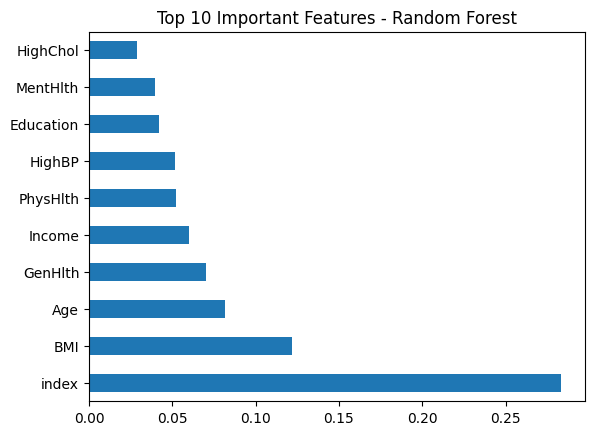

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]


print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest')
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:11:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC Score: 0.8892871129108282


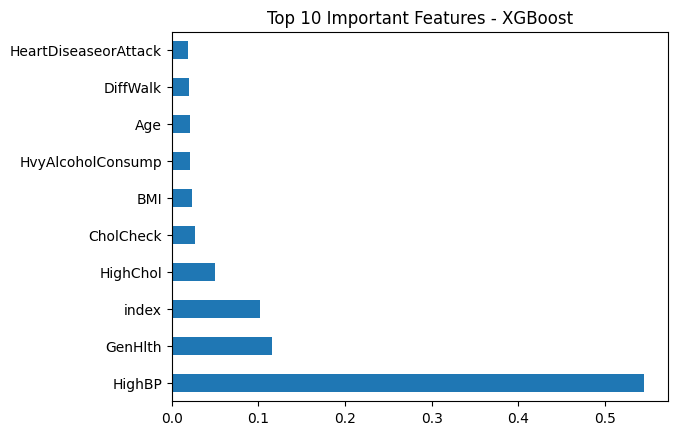

In [8]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))

# Feature importance
xgb_feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - XGBoost')
plt.show()